# Visualisation of the DynAstVO database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from packages.dataCleaner import cleanData
from packages.chunkReader import readByChunks, concatenate

## Cleaning the data file

The raw file contains Optical, Spatial and Radar observations, which are written in the text file using different formats. We need to clean this file in order to work with the data. We split the file into 2 distinct files, suppressing every useless line of data (object header and the position of a satellite in the case of spatial observation)

In [2]:
INPUT_FILE = 'Data\\OMC20200621.txt'
OPTICAL_SPACE_OUTPUT_FILE = 'Data\\OpticalSpaceData.txt'
RADAR_OUTPUT_FILE = 'Data\\RadarData.txt'

cleanData(INPUT_FILE, OPTICAL_SPACE_OUTPUT_FILE, RADAR_OUTPUT_FILE)

2571320it [00:16, 153616.39it/s]


## Reading the data

### Optical and Spatial data

Firstly, we give a name to every column (cf documentation), and we read the file, previously separated according to the type of observation.
We start with the optical and spatial observations together in the same Dataframe because they have the same format.

In [3]:

OScolnames = {'obs Type': 'category',
              'measure Type': 'category',
              'year': np.uint16,
              'month': np.uint8,
              'day': np.float64,
              'RA': np.float64,
              'DEC': np.float64,
              'Obs Code': 'category',
              'RA bias correction': np.float32,
              'DEC bias correction': np.float32,
              'RA precision': np.float64,
              'DEC precision': np.float64,
              'acceptance': 'bool',
              'catalog': 'category',
              'mag': np.float64,
              'nbr obs': np.float16,
              'random number': np.float64,
              'RA delta': np.float64,
              'DEC delta': np.float64,
              'xhi square': np.float64,
              'mag acceptance': np.float16,
              'mag delta': np.float64,
              'object number': 'category'}
LINES_PER_CHUNK = 100000
OSdata = readByChunks("Data\\OpticalSpaceData.txt", OScolnames, LINES_PER_CHUNK)


### Radar Data

We repeat this step for the Radar data, which uses a different format.

In [4]:
RadarColnames = {'obs Type': 'category',
                 'measure Type': 'category',
                 'year': np.uint16,
                 'month': np.uint8,
                 'day': np.float64,
                 'Distance/Velocity': np.float64,
                 'c': 'category',
                 'Obs Code tr': 'category',
                 'Obs Code rc': 'category',
                 'bias correction': np.float32,
                 'precision': np.float64,
                 'acceptance': 'bool',
                 'RA delta': np.float64,
                 'xhi square': np.float64,
                 'object number': 'category'}

Rdata = readByChunks("Data\\RadarData.txt", RadarColnames, LINES_PER_CHUNK)

## Creating the dataframe

Finally, we need to concatenate the data from those two dataframes so that we have a unique dataframe with everything ordered.

In [5]:
data_complete = concatenate([OSdata, Rdata])

## Most important observatories

Some observatories are publishing a lot more data than others, and so are more reliable. Let's try to visualise which observatories are the most important by ploting the number of observations per observatory.

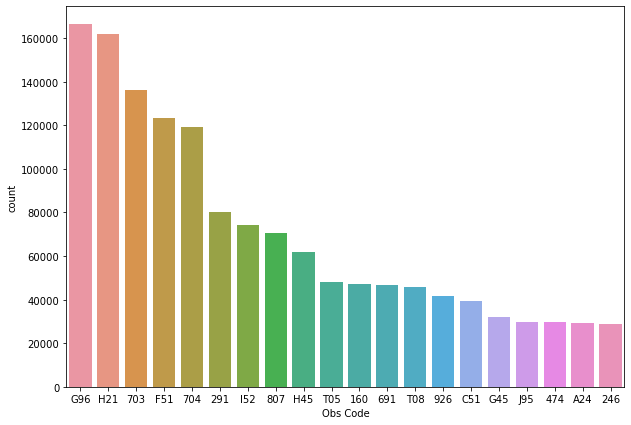

In [10]:
# plot the number of observations for the 20 bigest observatories
plt.figure(figsize=(10,7))
sns.countplot(x='Obs Code', data=OSdata, order=OSdata['Obs Code'].value_counts().head(20).index)

We can notice that the observatory G96 is the greatest contributor. This code corresponds to the Mt. Lemmon Survey observatory. H21 is the Astronomical Research Observatory, Westfield. The full list can be found here https://minorplanetcenter.net/iau/lists/ObsCodesF.html 